In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports_notebook.py

In [3]:
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
model = GPT2LMHeadModel.from_pretrained("distilgpt2")
model = model.to(device)

In [4]:
from perplexity import calc_perplexity

Token indices sequence length is longer than the specified maximum sequence length for this model (15085 > 1024). Running this sequence through the model will result in indexing errors


  0%|          | 0/15085 [00:00<?, ?it/s]

Found NaN value
Context Length:  010, ppl:  97.87406


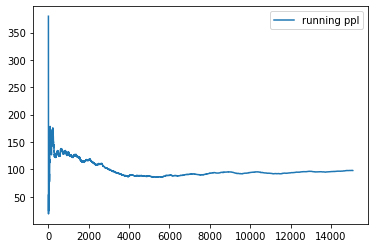

  0%|          | 0/15085 [00:00<?, ?it/s]

Found NaN value
Context Length:  020, ppl:  77.05295


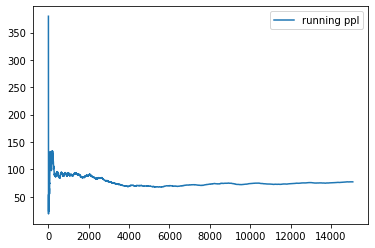

  0%|          | 0/15085 [00:00<?, ?it/s]

Found NaN value
Context Length:  050, ppl:  60.37893


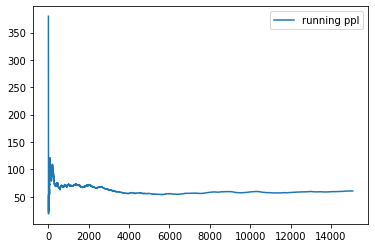

  0%|          | 0/15085 [00:00<?, ?it/s]

Found NaN value
Context Length:  100, ppl:  49.20908


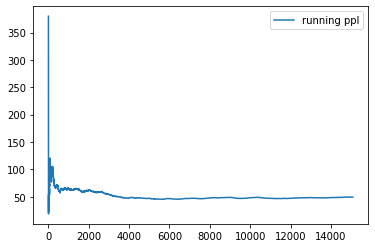

  0%|          | 0/15085 [00:00<?, ?it/s]

Found NaN value
Context Length:  200, ppl:  42.59275


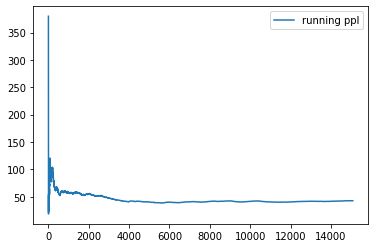

  0%|          | 0/15085 [00:00<?, ?it/s]

Found NaN value
Context Length:  400, ppl:  39.08246


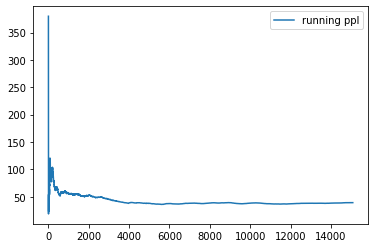

In [5]:
ppl_runnings = []
for context_length in [10, 20, 50, 100, 200, 400]:
    ppl, nlls = calc_perplexity(tokenizer, model, context_length=context_length, stride=1, device=device, tqdm=tqdm)
    print(f'Context Length: {context_length: 04d}, ppl: {ppl: .5f}')
    # plt.plot(to_np(nlls.exp()))
    ppl_running = (nlls.cumsum(dim=0)/torch.arange(1, len(nlls)+1, device=nlls.device)).exp()
    ppl_now = nlls.exp()
    ppl_runnings.append(ppl_running)
    # plt.plot(to_np(ppl_now), label='ppl now')
    plt.plot(to_np(ppl_running), label='running ppl')
    plt.legend()
    plt.show()
    

(0.0, 150.0)

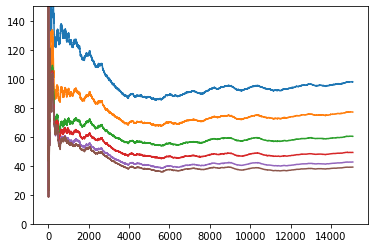

In [13]:
plt.plot(to_np(torch.stack(ppl_runnings)).T)
plt.ylim(0, 150)

In [60]:
x = tokenizer.encode("once upon a time")

for i in range(100):
    token = model.forward(torch.tensor(x[-30:])[None]).logits[0, -1].argsort(dim=-1)[-3].item()
    x.append(token)
    print(tokenizer.decode(x))

once upon a time,
once upon a time, and
once upon a time, and that
once upon a time, and that was
once upon a time, and that was when
once upon a time, and that was when he
once upon a time, and that was when he came
once upon a time, and that was when he came into
once upon a time, and that was when he came into power
once upon a time, and that was when he came into power."
once upon a time, and that was when he came into power." —
once upon a time, and that was when he came into power." —The
once upon a time, and that was when he came into power." —The Great
once upon a time, and that was when he came into power." —The Great White
once upon a time, and that was when he came into power." —The Great White King
once upon a time, and that was when he came into power." —The Great White King

once upon a time, and that was when he came into power." —The Great White King
"
once upon a time, and that was when he came into power." —The Great White King
"And
once upon a time, and that was when

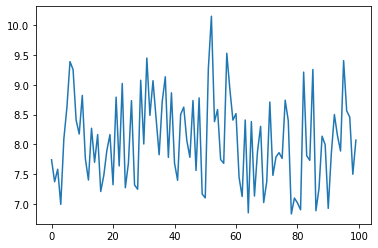

In [164]:
plt.plot(torch.randn(100, 64).norm(dim=-1).numpy())

In [161]:
x = tokenizer.encode("in a galaxy far, far away star wars happened", return_tensors="pt")
print(x.shape[-1])

# x = torch.cat([torch.tensor(tokenizer.unk_token_id)[None, None], x], dim=-1)
# outputs = model.forward(x, torch.randn(6, 2, 1, 12, 20, 64), output_attentions=True)
outputs = model.forward(x, output_attentions=True)
# (batch, head, seq_length, head_features)

10


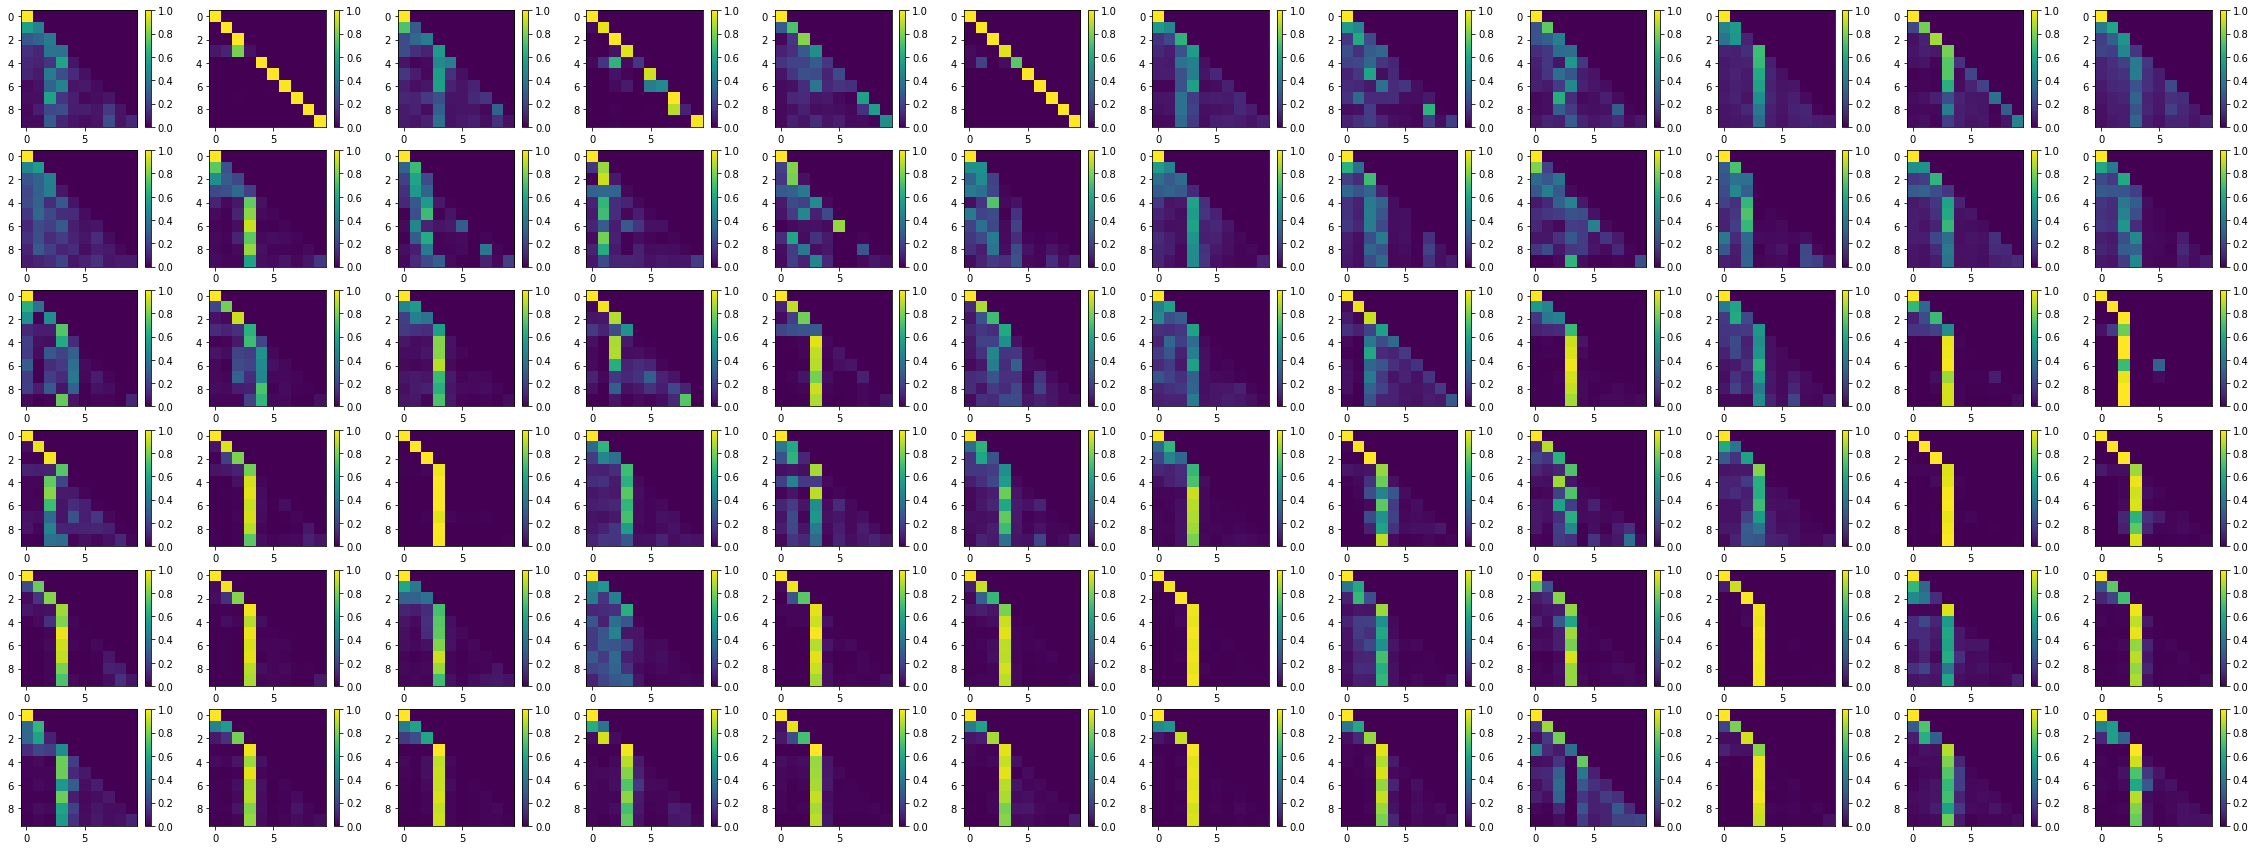

In [160]:
n_layers = model.config.n_layer
n_heads = model.config.n_head
plt.figure(figsize=(40, 15))
for i_layer, layer in enumerate(outputs.attentions):
    for i_head, head in enumerate(layer[0]):
        plt.subplot(n_layers, n_heads, i_layer*n_heads+i_head+1)
        plt.imshow(to_np(head), vmin=0, vmax=1)
        plt.colorbar()
plt.show()

In [47]:
from perplexity import calc_perplexity

In [54]:
calc_perplexity(tokenizer, model, device='cuda', context_length=100)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:23<00:00, 211.56it/s]

4999 5000


tensor(39.2938, device='cuda:0')

In [ ]:
class HopfieldMemory():
    pass

In [ ]:
Hopfield

In [2]:
with open('book.txt') as f:
    data = f.read()

In [3]:
len(data)

79959

In [26]:
from transformers import GPT2Model, AutoTokenizer, AutoModelForCausalLM
from memory_gpt2 import *

In [27]:
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")

model = AutoModelForCausalLM.from_pretrained("distilgpt2")

In [28]:
type(model)

transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel

In [8]:
all_tokens = tokenizer.encode(data, return_tensors='pt')

Token indices sequence length is longer than the specified maximum sequence length for this model (22205 > 1024). Running this sequence through the model will result in indexing errors


In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [27]:
model = model.to(device)

In [28]:
def calc_perplexity(model, all_tokens, context_length=100):
    
    losses = []
    # for i in tqdm(range(context_length, all_tokens.shape[-1])):
    for i in tqdm(range(context_length, context_length+100)):
        with torch.no_grad():
            x = all_tokens[:, max(i-context_length, 0):i]
            x = x.to(device)
            yp = model(input_ids=x, labels=x)
            losses.append(yp.loss.item())
    return losses
    
    
losses = calc_perplexity(model, all_tokens, context_length=100)
    


NameError: name 'all_tokens' is not defined

In [15]:
import matplotlib.pyplot as plt

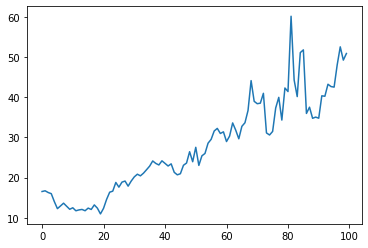

In [18]:
plt.plot(np.e**np.array(losses))

In [19]:
model.config.n_positions

1024